# Tokay Gecko Mating Call Analysis

##### Purpose
In this notebook we explore some basic questions about the Tokay Gecko by analyzing the distribution of
the frequencies of their mating calls.

##### Using this notebook
To allow for future reproducibility, this notebook contains all the logic used to process and analyze the data. The analysis can be re run by downloading the notebook with the csv file. 
Contact me if you have any questions or need help reproducing the results.

# Table of Contents


1. [First exploration of the Tokay dataset](#intro)

    1.1 [Import the data](#import)
    
    1.2 [Initial Bar Chart](#basiccharts)
    
    1.3 [Full Bar Chart](#fullcharts)
    

2. [Research on existing literature](#research)

    2.1 [Brillet & Paillette](#brillet)
    
    2.2 [Singh & Choudhury](#singh)
    
        
3. [Probability of bad luck](#probad)


4. [Conclusions](#conclusions)

In [27]:
import pandas as pd 
# pandas config
pd.set_option('float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 200)
from IPython.display import Image

import numpy as np
from scipy.stats import skewnorm
from scipy.stats import skew, mode
from statistics import mean
from numpy import var
from scipy.stats import kurtosis
from scipy import stats
import matplotlib.pyplot as plt

# First exploration of the Tokay dataset <a id=intro><a>

### Import the data <a id=import></a>

In [3]:
data = pd.read_csv("dataset.csv") 

In [4]:
data.tail(7)

,Date,in/out,Time,Count
91,27-05-2020,out,19:01,6
92,27-05-2020,out,19:19,5
93,27-05-2020,out,19:54,6
94,27-05-2020,out,20:30,5
95,27-05-2020,out,20:33,6
96,27-05-2020,out,20:35,5
97,27-05-2020,out,20:36,6


First thing I noticed was that of the first 30 records, only the first one was a 7.  This was surprising and supported the idea that "7" was a rare event.  However, all of a sudden 7 became a rather common occurrence.  I got into reading some literature and developed a hypothesis: each gecko has a preference for the amount of times they call, and the population of geckos in my area was not that big. More on that later.

Here we see a histogram of the first 42 records.  You can see a somewhat bimodal distribution with peaks at 6 and 8 calls.  However, sample is a bit small to draw conclusions.

### Basic Bar Charts <a id=basiccharts></a>

In [5]:
first_records = data[1:42].groupby('Count')['Count'].value_counts()


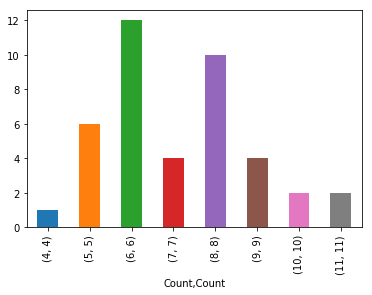

In [25]:
first_records.plot.bar()

### Same chart with the entire dataset: <a id=fullcharts></a>

In [64]:
all_records = data.groupby('Count')['Count'].value_counts()

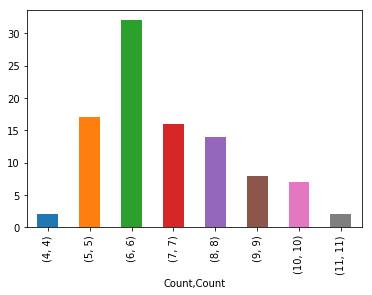

In [65]:
all_records.plot.bar()

Interesting, we seem to be shifting to a left skewed distribution with mode = 6

Now, on any given day from our dataset, how many times will you hear a gecko calling?

In [7]:
date_records = data.groupby('Date')['Date'].value_counts()
mean(date_records)

7.333333333333333

# Research on existing literature <a id=research><a>

## Brillet & Paillette <a id=brillet><a>

I found an interesting paper from 1991 named "Acoustic signals of the nocturnal lizard Gekko Gecko: Analysis of the 'long complex sequence'" by Charles Brillet & Madeleine Paillette, published in "The International Journal of Animal Sound and its Recording".

The focus of their analysis is on the duration of the entire "ritual" of the gecko's mating call.  For this study they had 4 geckos in captivity, and most records came from a single specimen.

The following is the histogram of 60 recordings from the same individual:

In [8]:
paper1_data = {"Calls":["3", "4", "5", "6", "7", "8"],

        "Counts":[1, 1, 3, 16, 32, 7]

        };

# Dictionary loaded into a DataFrame       

paper1_df = pd.DataFrame(data=paper1_data);

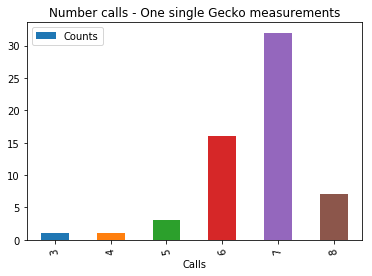

In [9]:
paper1_df.plot.bar(x="Calls", y="Counts", rot=100, title="Number calls - One single Gecko measurements");

This reinforces the suspicion that geckos have a strong preference for a certain amount of calls.  In this case, the gecko preferred 7 calls (an unlucky boy this one).  

Furthermore, if I can somehow confirm that the population of geckos is rather small in the vicinity of my house, then the seemingly bimodal distribution seen in the beginning of the dataset would make a lot of sense.  This is how I came across the next paper.

## Singh & Choudhury <a id=singh><a>

The paper "Habitat Preference Of Tokay Gecko (Gekko gecko) In Barak Valley Of Assam, India" by Singh and Choudhury from 2016, published in the "Journal of Bioresources", gives a vague indication to my prior question.

They inspected a specific area of the Valley of Assam and found 6.92 Tokay geckos per kilometer. I assume their methodology was to walk straight ahead in a particular direction, rather than sweeping an entire area, so we don't have a figure per km^2.  This estimate however, supports the idea that there shouldn't be too many of these creatures in the vicinity of my house.  My educated guess is that I have been recording the calls of a minimum of 5 different individuals and a maximum of 10, each with their own preference of number of calls.

# Probability of bad luck <a id=probad><a>

In the rest of the analysis, we will assume that sample size is big enough (and that number of specimens is big enough) and proceed to estimate the distributions, completeley disregarding confidence with respect to the sample size, in order to have a first answer to the main question of this notebook:  What is the probability of being unlucky after hearing a Tokay gecko call?

We want to approximate our observations via a normal distribution with a skew.  Let's first estimate mean, mode and deviation:

In [10]:
obs_mean = mean(data['Count'])
obs_mean

6.86734693877551

In [11]:
obs_var = var(data['Count'])
obs_var

2.6252603082049144

In [12]:
obs_var = mode(data['Count'])
obs_var[0][0]

6

And let's fit the skewed distribution:

In [13]:
a, loc, scale = 1.3, -0.1, 2.2
sample = data['Count']
ae, loce, scalee = stats.skewnorm.fit(sample)

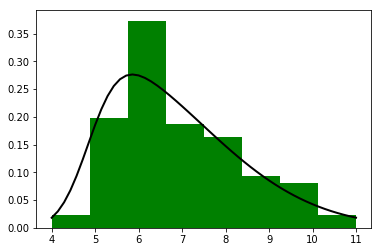

In [28]:
plt.figure()
plt.hist(data['Count'], bins=8, normed=True,  color='g')
x = np.linspace(min(data['Count']), max(data['Count']))
p = stats.skewnorm.pdf(x,ae, loce, scalee)
plt.plot(x, p, 'k', linewidth=2)

In [17]:
def prob(a,b):
    return stats.skewnorm.cdf(b,ae, loce, scalee) - stats.skewnorm.cdf(a,ae, loce, scalee)

In [18]:
round(prob(6.5,7.5)*100)/100

0.22

So we do this simple estimate of the probability of encountering "7" for any given gecko calling.  The probability is 22%.

# Conclusion <a id=conclusion><a>

So we have found that there is a 22% chance of hearing 7 calls from a Tokay Gecko.

Is this enough to consider it a rare event?  

In my subjective opinion, this superstition is not warranted given our dataset, I would have liked to see something under 5%.

Our verdict for this superstition is:

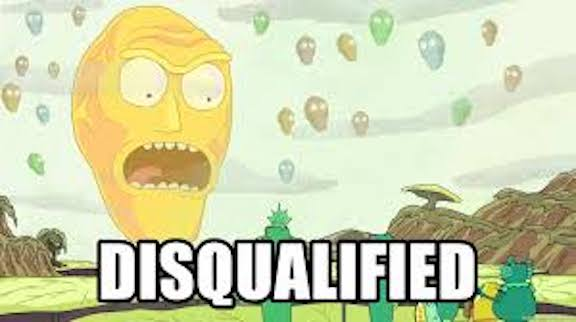

In [19]:
Image(filename='disqualified.jpeg')

Not everything is lost however.  I would like to propose a modification.

In [23]:
round(prob(3.5,4.5)*100)/100

0.03

The probability of hearing only 4 calls is around 3%, and it is also much easier to count up to 4 without paying much attention.  So the superstition makes much more sense if we define it as:

"Hearing 4 calls from a Tokay Gecko gives you bad luck".
    

Let's make this a better world.  Let's all believe in the modified version of this superstition, and help foster a more rational society.